# Supervised Machine Learning: regression and its metrics
Regression in machine learning is a technique used for predicting continuous outcomes. In simple terms, it's like finding the best-fitting line through a scatter plot of data points. This line can then be used to predict future values. For example, if you want to predict the mileage of a car based on its features like weight, horsepower, and displacement, you could use regression. You would plot the average MPG of each car given its features, then use regression to find the relationship between MPG and the features. This relationship can then be used to predict the MPG of other cars based on their features.

---
## 1.&nbsp;Import libraries and files 💾
For this workshop, we'll be using the diamonds dataset from seaborn, which contains information on diamond prices and their attributes, such as carat, cut, color, and clarity.

Read text file to get idea about columns
https://drive.google.com/file/d/1lhv-pfyGKc-Z6nLxvbVJe3Ok62bVX6Ik/view?usp=sharing

## 1. Data reading & first glance

In [2]:
import pandas as pd
import numpy as np
import sklearn
#sklearn. __version__ # Make sure to use updated version

# To plot graphs
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns

# To split the data into train and test
# To implement grid search (the process of tuning parameters with K-Fold Cross Validation)
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression, RFECV, SelectFromModel

# To fill missing values using impute
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder

# To creat a pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# import the model
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor #(>10000 samples)

# Accurac metrics to chk model performance
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error,r2_score, make_scorer, root_mean_squared_log_error

# For static plots
%matplotlib inline
# Or:
#%matplotlib notebook  # For interactive plots

# To get analysis of entire data
#from ydata_profiling import ProfileReport

#If you want pipe steps presented like text
from sklearn import set_config
pd.set_option('display.max_rows', 1500)


In [3]:
# reading House Price Prediction dataset
url = "https://drive.google.com/file/d/1eRDggfya_LSpjKsaQSpNy8XcAA0X_-Lf/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

HP_data = pd.read_csv(path)
HP_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 2.Basic Exploration &  Data Cleaning

In [4]:
#report = ProfileReport(HP_data)
#report

In [5]:
HP_data.drop(columns='Id', inplace=True)

In [6]:
# Step 1: Identify columns with high missing values (more than 80%)
missing_summary = HP_data.isnull().sum().sort_values(ascending=False)
#Converting into percentage
high_missing_features = missing_summary[missing_summary / HP_data.shape[0] > 0.8].index.tolist()
high_missing_features

['PoolQC', 'MiscFeature', 'Alley', 'Fence']

In [7]:
HP_data.loc[
    HP_data['PoolQC'].isnull() |
    HP_data['MiscFeature'].isnull()|
    HP_data['Alley'].isnull() |
    HP_data['Fence'].isnull(),
    ['PoolArea','PoolQC', 'MiscVal','MiscFeature', 'Street','Alley', 'Fence', 'SalePrice']
]

,PoolArea,PoolQC,MiscVal,MiscFeature,Street,Alley,Fence,SalePrice
0,0,NaN,0,NaN,Pave,NaN,NaN,208500
1,0,NaN,0,NaN,Pave,NaN,NaN,181500
2,0,NaN,0,NaN,Pave,NaN,NaN,223500
3,0,NaN,0,NaN,Pave,NaN,NaN,140000
4,0,NaN,0,NaN,Pave,NaN,NaN,250000
5,0,NaN,700,Shed,Pave,NaN,MnPrv,143000
6,0,NaN,0,NaN,Pave,NaN,NaN,307000
7,0,NaN,350,Shed,Pave,NaN,NaN,200000
8,0,NaN,0,NaN,Pave,NaN,NaN,129900
9,0,NaN,0,NaN,Pave,NaN,NaN,118000


In [8]:
HP_data.loc[
    HP_data['BsmtQual'].isnull() |
    HP_data['BsmtCond'].isnull() |
    HP_data['BsmtExposure'].isnull() |
    HP_data['BsmtFinType1'].isnull() |
    HP_data['BsmtFinType2'].isnull(),
    ['TotalBsmtSF','BsmtQual', 'BsmtCond',
     'BsmtExposure','BsmtFinSF1', 'BsmtFinType1',
     'BsmtFinSF2','BsmtFinType2','BsmtUnfSF',
     'BsmtFullBath','BsmtHalfBath']]

,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFinSF2,BsmtFinType2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath
17,0,NaN,NaN,NaN,0,NaN,0,NaN,0,0,0
39,0,NaN,NaN,NaN,0,NaN,0,NaN,0,0,0
90,0,NaN,NaN,NaN,0,NaN,0,NaN,0,0,0
102,0,NaN,NaN,NaN,0,NaN,0,NaN,0,0,0
156,0,NaN,NaN,NaN,0,NaN,0,NaN,0,0,0
182,0,NaN,NaN,NaN,0,NaN,0,NaN,0,0,0
259,0,NaN,NaN,NaN,0,NaN,0,NaN,0,0,0
332,3206,Gd,TA,No,1124,GLQ,479,NaN,1603,1,0
342,0,NaN,NaN,NaN,0,NaN,0,NaN,0,0,0
362,0,NaN,NaN,NaN,0,NaN,0,NaN,0,0,0


In [9]:
BasementColumns_to_replace = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

# Create a mask to identify rows that are not 332 or 948
mask = ~HP_data.index.isin([332, 948])

# Replace NaN with 'NA' in the selected columns, except for rows 332 and 948
HP_data.loc[mask, BasementColumns_to_replace] = HP_data.loc[mask, BasementColumns_to_replace].fillna("NA")


In [10]:
# MasVnrArea: Masonry veneer area in square feet
# MasVnrType: Masonry veneer type
# Area > 0 and Tpe is NaN
MasVnrType_null_MasVnrArea = HP_data.loc[
    HP_data['MasVnrType'].isnull() &
    ~HP_data['MasVnrArea'].isnull() &
    HP_data['MasVnrArea'] > 0.0,
    ['MasVnrArea','MasVnrType']]

MasVnrType_null_MasVnrArea

,MasVnrArea,MasVnrType
624,288.0,NaN
773,1.0,NaN
1230,1.0,NaN
1300,344.0,NaN
1334,312.0,NaN


In [11]:
# Create a mask to identify rows that are True for MasVnrType_null
mask0 = HP_data.index.isin(MasVnrType_null_MasVnrArea.index)

# Replace NaN with 'CBlock' i.e. cinder Block in the selected columns
HP_data.loc[mask0, 'MasVnrType'] = HP_data.loc[mask0, 'MasVnrType'].fillna("CBlock")

Replace 5 rows of NaN with 'CBlock' i.e. cinder Block as MasVnrArea is greater than 0

In [12]:
HP_data.loc[HP_data['MasVnrType'].isnull(),
            ['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType
1,0.0,NaN
3,0.0,NaN
5,0.0,NaN
8,0.0,NaN
9,0.0,NaN
10,0.0,NaN
12,0.0,NaN
15,0.0,NaN
17,0.0,NaN
18,0.0,NaN


In [13]:
# Replace NaN with 'None' in the selected column
HP_data['MasVnrType'] = HP_data.loc[:,'MasVnrType'].fillna("None")

In [14]:
HP_data.loc[HP_data['FireplaceQu'].isnull(),
            ['Fireplaces','FireplaceQu']]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
17,0,NaN
18,0,NaN
19,0,NaN
26,0,NaN
29,0,NaN


In [15]:
HP_data.loc[
    HP_data['GarageType'].isnull() |
    HP_data['GarageFinish'].isnull() |
    HP_data['GarageQual'].isnull() |
    HP_data['GarageCond'].isnull(),
    ['GarageArea','GarageCars', 'YearBuilt', 'YearRemodAdd','GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']]

,GarageArea,GarageCars,YearBuilt,YearRemodAdd,GarageYrBlt,GarageType,GarageFinish,GarageQual,GarageCond
39,0,0,1955,1955,NaN,NaN,NaN,NaN,NaN
48,0,0,1920,2008,NaN,NaN,NaN,NaN,NaN
78,0,0,1968,1968,NaN,NaN,NaN,NaN,NaN
88,0,0,1915,1982,NaN,NaN,NaN,NaN,NaN
89,0,0,1994,1995,NaN,NaN,NaN,NaN,NaN
99,0,0,1959,1959,NaN,NaN,NaN,NaN,NaN
108,0,0,1919,2005,NaN,NaN,NaN,NaN,NaN
125,0,0,1935,1982,NaN,NaN,NaN,NaN,NaN
127,0,0,1930,1950,NaN,NaN,NaN,NaN,NaN
140,0,0,1971,1971,NaN,NaN,NaN,NaN,NaN


NA is category representing no fireplace, no pool, no extra feature, no alle access, no fence, no garage

In [16]:
Columns_to_replace_NaN = ['FireplaceQu', 'PoolQC', 'MiscFeature','Alley', 'Fence', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

# Replace NaN with 'NA' in the selected columns
HP_data.loc[:, Columns_to_replace_NaN] = HP_data.loc[:, Columns_to_replace_NaN].fillna("NA")

In [17]:
pd.set_option('display.max_rows', 1500)
HP_data.loc[:,['GarageYrBlt', 'YearBuilt', 'YearRemodAdd']]

,GarageYrBlt,YearBuilt,YearRemodAdd
0,2003.0,2003,2003
1,1976.0,1976,1976
2,2001.0,2001,2002
3,1998.0,1915,1970
4,2000.0,2000,2000
5,1993.0,1993,1995
6,2004.0,2004,2005
7,1973.0,1973,1973
8,1931.0,1931,1950
9,1939.0,1939,1950


In [18]:
# Separate the rows where GarageArea is 0
no_garage_condition = (HP_data['GarageArea'] == 0) & (HP_data['GarageYrBlt'].isnull())

# Replace GarageYrBlt with 0 where GarageArea is 0
HP_data.loc[no_garage_condition, 'GarageYrBlt'] = 0

In [19]:
HP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [20]:
HP_data.duplicated().sum()

0

### 3. Checking highly corelated features

In [21]:
# Step 2: Identify numeric and categorical columns
num_features = HP_data.select_dtypes(include=['int64', 'float64'])
numeric_features = num_features.columns.tolist()
categorical_features = HP_data.select_dtypes(include=['object']).columns.tolist()

# Step 3: Correlation Analysis for numeric features
correlation_matrix = num_features.corr()
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Step 4: Prepare results
results = {
    "numeric_features": numeric_features,
    "categorical_features": categorical_features,
    "correlation_with_target": correlation_with_target # Top correlations with the target variable
}

results

{'numeric_features': ['MSSubClass',
  'LotFrontage',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageYrBlt',
  'GarageCars',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'MiscVal',
  'MoSold',
  'YrSold',
  'SalePrice'],
 'categorical_features': ['MSZoning',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'B

In [22]:
# Find pairs of highly correlated features
threshold = 0.8  # Set your threshold for "high" correlation
high_corr_pairs = correlation_matrix.where((correlation_matrix > threshold) & (correlation_matrix <= 1))

# Display highly correlated pairs
high_corr_pairs

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallCond,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Find feature pairs
high_corr = np.where((correlation_matrix > threshold) & (correlation_matrix < 1))
high_corr_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y]) for x, y in zip(*high_corr)]

# Display the pairs
print("Highly Correlated Pairs:")
for pair in high_corr_pairs:
    print(pair)

Highly Correlated Pairs:
('TotalBsmtSF', '1stFlrSF')
('1stFlrSF', 'TotalBsmtSF')
('GrLivArea', 'TotRmsAbvGrd')
('TotRmsAbvGrd', 'GrLivArea')
('GarageCars', 'GarageArea')
('GarageArea', 'GarageCars')


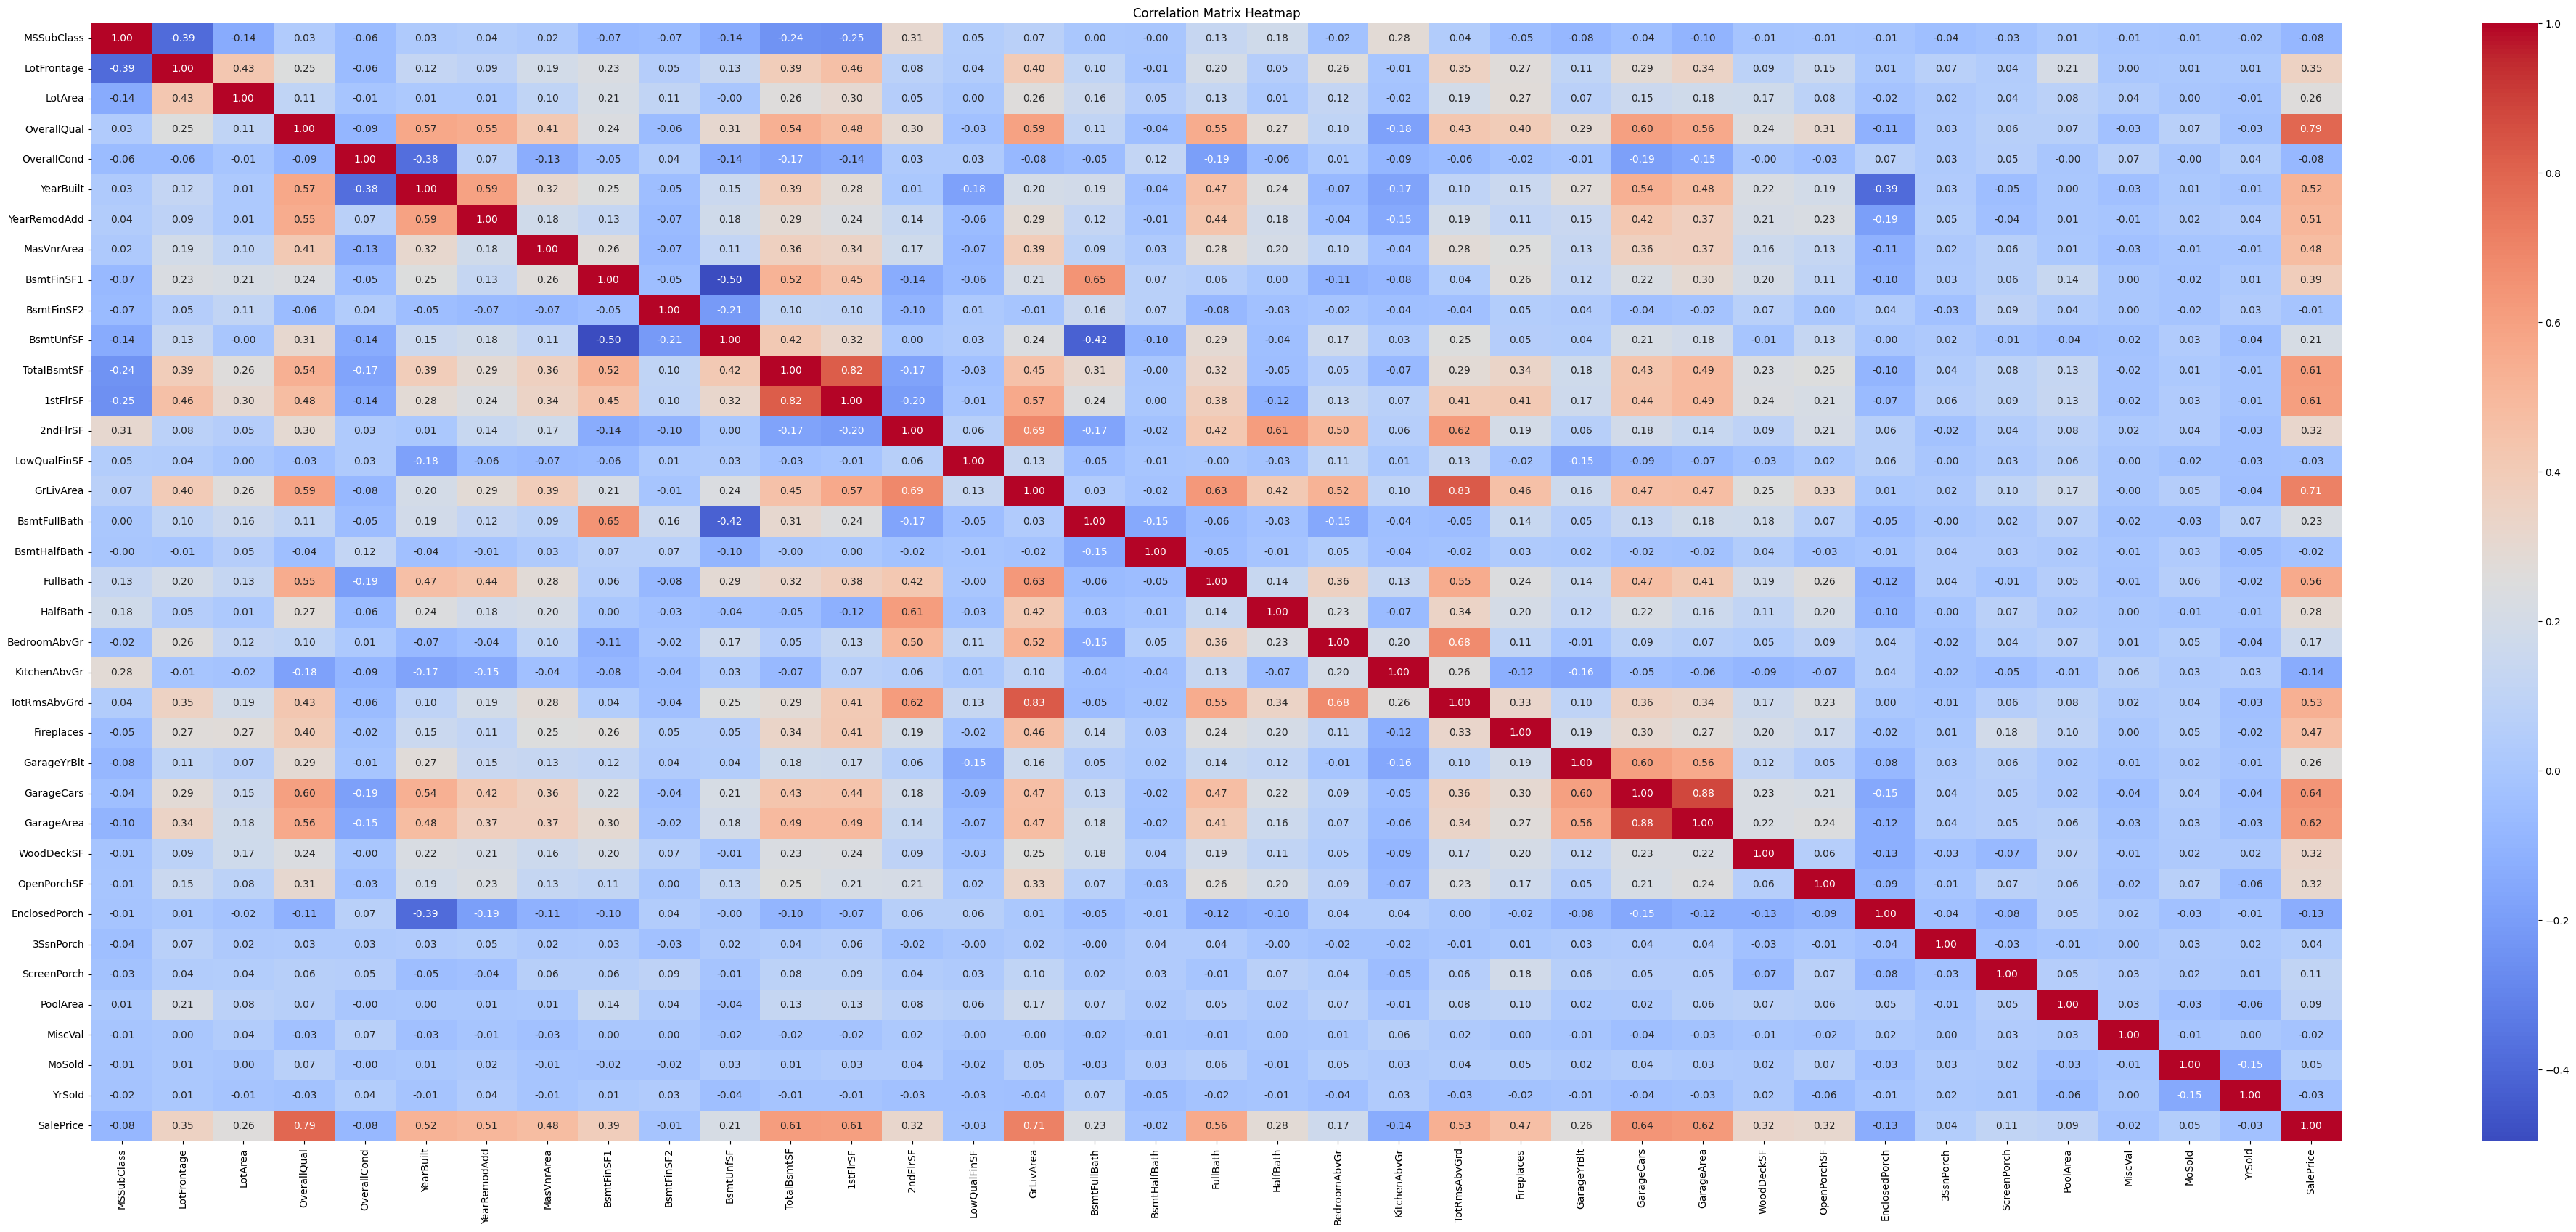

In [24]:
# Compute correlation matrix
correlation_matrix = num_features.corr()

# Create a heatmap
plt.figure(figsize=(50, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

The target column (what we want our model to predict) is usually denoted as `Y` and we call it a `label`. We will "pop" it out from the rest of the data:

The target is just a bunch of zeros and ones. 1 means the expensive and 0 means cheap:

In [25]:
# X and Y creation
Y = HP_data.pop("SalePrice")
X = HP_data

The "feature vector" (the columns used to predict the target) is denoted as `X`.

In [26]:
#X.hist(figsize=(10, 8));

## 3. Train-test split

Before performing a deeper exploration, we will split the dataset into 2 chunks: train and test. We will use the train set to find patterns in the data and create a model. The test set will remain untouched, unseen, unexplored. It will be the "reality check" for our model, it will let us know whether our model is able to generalize.

Here, we're using the function `train_test_split` to shuffle the observations randomly and create the train and test sets for both the `X` and the `y` objects at the same time, ensuring that they are shuffled the same way:

In [187]:
# data splitting
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state = 123)

## 4. Creating the `full_pipeline` (`preprocessor` + Model)

Pipelines are modular. The `preprocessor` we created above with the `make_column_transformer` can become now a step in a new pipeline, that we'll call `full_pipeline` and will include, as a last step:

### 4.1. Creating the "numeric pipe" and the "categoric pipe"

In [94]:
# 0. Set the config so that we can view our preprocessor, and to transform output from numpy arrays to pandas dataframes
set_config(display="diagram")
set_config(transform_output="pandas")

# 1. defining categorical & numerical columns
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

# select categorical and numerical column names
#excluding number column
#X_cat_columns = X.select_dtypes(exclude="number").columns

#including number column
#X_num_columns = X.select_dtypes(include="number").columns

# Specify the columns to scale
columns_to_scale = ['LotFrontage', 'LotArea', 'TotalBsmtSF', 'PoolArea',
                            'WoodDeckSF', 'ScreenPorch', 'MasVnrArea',
                            'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
                            'LowQualFinSF', 'GrLivArea', 'GarageArea',
                            'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MiscVal']

# 2. Create a numerical pipeline with imputation and scaling
numeric_scale_pipe1 = make_pipeline(
    SimpleImputer(),  # Impute missing values with the mean
    MinMaxScaler()
    # StandardScaler()  # Apply standard scaling
)

numcolumns = ['BedroomAbvGr', 'Fireplaces','GarageCars', 'MSSubClass', 'OverallQual', 'OverallCond',
                    'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                    'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'MoSold',
                    'YrSold']
numeric_pipe2 = make_pipeline(
    SimpleImputer(strategy='median'),  # Impute missing values with the median
)


* make_column_transformer() - This is a shorthand for the ColumnTransformer constructor; it does not require, and does not permit, naming the transformers.

In [95]:
# 3. categorical pipeline

# 3.1. Define categories for ordinal encoding
ordinal_cols = [
    'Street', 'CentralAir', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'KitchenQual', 'FireplaceQu', 'Alley', 'LotShape', 'LandContour', 'Utilities',
    'LotConfig', 'LandSlope', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'MasVnrType', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'Functional',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
    'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'
]

# 3.2. Define categories for one hot encoding
onehot_cols = ['MSZoning', 'Condition1', 'Heating', 'Foundation', 'Neighborhood', 'Condition2', 'BldgType']


# 3.3. Manually establish the order of the categories for our ordinal features, including "Unknown"
OrdinalRankings = {
    'Street': ["Unknown", "Grvl", "Pave"],
    'CentralAir': ["Unknown", "N", "Y"],
    'ExterQual': ["Unknown", "Po", "Fa", "TA", "Gd", "Ex"],
    'ExterCond': ["Unknown", "Po", "Fa", "TA", "Gd", "Ex"],
    'BsmtQual': ["Unknown", "NA", "Po", "Fa", "TA", "Gd", "Ex"],
    'BsmtCond': ["Unknown", "NA", "Po", "Fa", "TA", "Gd", "Ex"],
    'BsmtExposure': ["Unknown", "NA", "No", "Mn", "Av", "Gd"],
    'BsmtFinType1': ["Unknown", "NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    'KitchenQual': ["Unknown", "Po", "Fa", "TA", "Gd", "Ex"],
    'FireplaceQu': ["Unknown", "NA", "Po", "Fa", "TA", "Gd", "Ex"],
    'Alley': ["Unknown", "NA", "Grvl", "Pave"],
    'LotShape': ["Unknown", "IR3", "IR2", "IR1", "Reg"],
    'LandContour': ["Unknown", "Low", "HLS", "Bnk", "Lvl"],
    'Utilities': ["Unknown", "ELO", "NoSeWa", "NoSewr", "AllPub"],
    'LotConfig': ["Unknown", "Inside", "Corner", "FR2", "FR3", "CulDSac"],
    'LandSlope': ["Unknown", "Sev", "Mod", "Gtl"],
    #'BldgType': ["Unknown", "Twnhs", "TwnhsE", "Duplex", "2fmCon", "1Fam"],
    'HouseStyle': ['Unknown', '1Story', '1.5Unf', '1.5Fin', '2Story', '2.5Unf', '2.5Fin', 'SFoyer', 'SLvl'],
    'RoofStyle': ['Unknown', 'Flat', 'Shed', 'Gable', 'Hip', 'Mansard', 'Gambrel'],
    'RoofMatl': ['Unknown', 'Roll', 'Tar&Grv', 'CompShg', 'WdShngl', 'ClyTile', 'Metal', 'Membran', 'WdShake'],
    'Exterior1st': ['Unknown', 'AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd',
                    'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast',
                    'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'],
    'Exterior2nd': ['Unknown', 'AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd',
                    'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast',
                    'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'],
    'MasVnrType': ['Unknown', 'None', 'CBlock', 'BrkCmn', 'BrkFace', 'Stone'],
    'BsmtFinType2': ['Unknown', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC': ['Unknown', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Electrical': ['Unknown', 'Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'],
    'Functional': ['Unknown', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    'GarageType': ['Unknown', 'NA', 'CarPort', 'Detchd', 'Basment', 'BuiltIn', 'Attchd', '2Types'],
    'GarageFinish': ['Unknown', 'NA', 'Unf', 'RFn', 'Fin'],
    'GarageQual': ['Unknown', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['Unknown', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'PavedDrive': ['Unknown', 'N', 'P', 'Y'],
    'PoolQC': ['Unknown', 'NA', 'Fa', 'TA', 'Gd', 'Ex'],
    'Fence': ['Unknown', 'NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'],
    'MiscFeature': ['Unknown', 'NA', 'Othr', 'Shed', 'Gar2', 'Elev', 'TenC'],
    'SaleType': ['Unknown', 'Oth', 'ConLD', 'ConLI', 'ConLw', 'Con', 'COD', 'VWD', 'CWD', 'WD', 'New'],
    'SaleCondition': ['Unknown', 'Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial']
}

# 3.4. Create the ordinal encoder pipe
ordinal_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="Unknown"),
    OrdinalEncoder(
    categories=[OrdinalRankings[col] for col in ordinal_cols if col in OrdinalRankings],
    handle_unknown="use_encoded_value",
    unknown_value=-1
)
)


# 3.5. create one-hot encoder pipe
onehot_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="Unknown"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

# 4. full preprocessing: a make_column_transformer with 4 branches: numeric & categorical
preprocessor = make_column_transformer(
    (numeric_scale_pipe1, columns_to_scale),  # Apply the pipeline to numeric columns
    (numeric_pipe2, numcolumns),
    (ordinal_pipe, ordinal_cols),  # Apply ordinal encoding pipeline
    (onehot_pipe, onehot_cols),  # Apply one-hot encoding pipeline
    remainder="passthrough",  # Leave other columns unchanged
    force_int_remainder_cols = False  #stored as indices (int) rather than column names (str).
)
preprocessor

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['LotFrontage', 'LotArea', 'TotalBsmtSF',
                                  'PoolArea', 'WoodDeckSF', 'ScreenPorch',
                                  'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                                  'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
                                  'LowQualFinSF',...
                                  'Electrical', 'Functional', 'GarageType',
                                  'GarageFinish', 'GarageQual', 'GarageCond', ...]),
                                ('pipeline-4',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['MSZoning', 'Condition1', 'Heating',
                                  'Foundation', 'Neighborhood', 'Condition2',
                                  'BldgType'])])

In [92]:
#preprocessor.get_feature_names_out
preprocessor.n_features_in_

79

### 4.2 Choosing a SKLearn model 🧠
SKLearn has a great [guide for models](https://scikit-learn.org/1.3/tutorial/machine_learning_map/index.html#).

#### 4.2.1 Function to compare different Regressor models using default parameters and all features

pipeline = Preprocessor + regressor_model

In [231]:
def evaluate_regressors(x_train, y_train, x_test, y_test, preprocessor, regressors):
    """
    Trains and evaluates multiple regressors and returns a comparison DataFrame.

    Parameters:
        x_train (DataFrame): Training features.
        y_train (Series): Training target.
        x_test (DataFrame): Test features.
        y_test (Series): Test target.
        preprocessor: Preprocessing pipeline to apply to the data.
        regressors (dict): Dictionary of regressors with names as keys and regressor objects as values.

    Returns:
        DataFrame: Comparison of R-squared and MAPE for each model.
    """
    results = {"MAE": [], "RMSE": [], "RMSLogE": [], "MAPE": [], "R2_Score": []}
    model_names = []

    for name, regressor in regressors.items():
        # Create and fit the pipeline
        pipeline = make_pipeline(preprocessor,  # Preprocessing step
                                 regressor      # Final regressor
                                 )
        pipeline.fit(x_train, y_train)

        # Predict and evaluate
        predictions = pipeline.predict(x_test)

        mae = mean_absolute_error(y_test, predictions)
        rmse = root_mean_squared_error(y_test, predictions)
        rmsloge = root_mean_squared_log_error(y_test, predictions)
        mape = mean_absolute_percentage_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        # Store results
        results["MAE"].append(mae)
        results["RMSE"].append(rmse)
        results["RMSLogE"].append(rmsloge)
        results["MAPE"].append(mape)
        results["R2_Score"].append(r2)
        model_names.append(name)

    # Create DataFrame
    comparing_models_df = pd.DataFrame(results, index=model_names)
    return comparing_models_df


In [232]:
# Regression models
regressors = {
    "LinearRegression": LinearRegression(),
    #"StochasticGradientDecent": SGDRegressor(), #(>10000 samples)
    "Lasso": Lasso(),
    "SupportVectorRegressor": SVR(),
    "DecisionTree": DecisionTreeRegressor(random_state=123),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=123),
    "HistGradientBoostingRegressor": HistGradientBoostingRegressor(random_state=123),
    "RandomForestRegressor": RandomForestRegressor(random_state=123)
}

# Dataframe to save results
comparison_df = evaluate_regressors(x_train, y_train, x_test, y_test, preprocessor, regressors)
comparison_df

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.514e+11, tolerance: 7.673e+08
  model = cd_fast.enet_coordinate_descent(


,MAE,RMSE,RMSLogE,MAPE,R2_Score
LinearRegression,19799.128903,31091.061230,0.142669,0.105541,0.860427
Lasso,19762.943001,31064.047085,0.142184,0.105291,0.860670
SupportVectorRegressor,57137.603392,87722.519647,0.386855,0.277285,-0.111095
DecisionTree,28665.602740,44301.563142,0.212306,0.149059,0.716621
GradientBoostingRegressor,15768.661052,25941.855493,0.106244,0.079931,0.902830
HistGradientBoostingRegressor,17218.350219,27953.725585,0.115151,0.087049,0.887174
RandomForestRegressor,17632.854977,29337.754508,0.123185,0.089285,0.875725


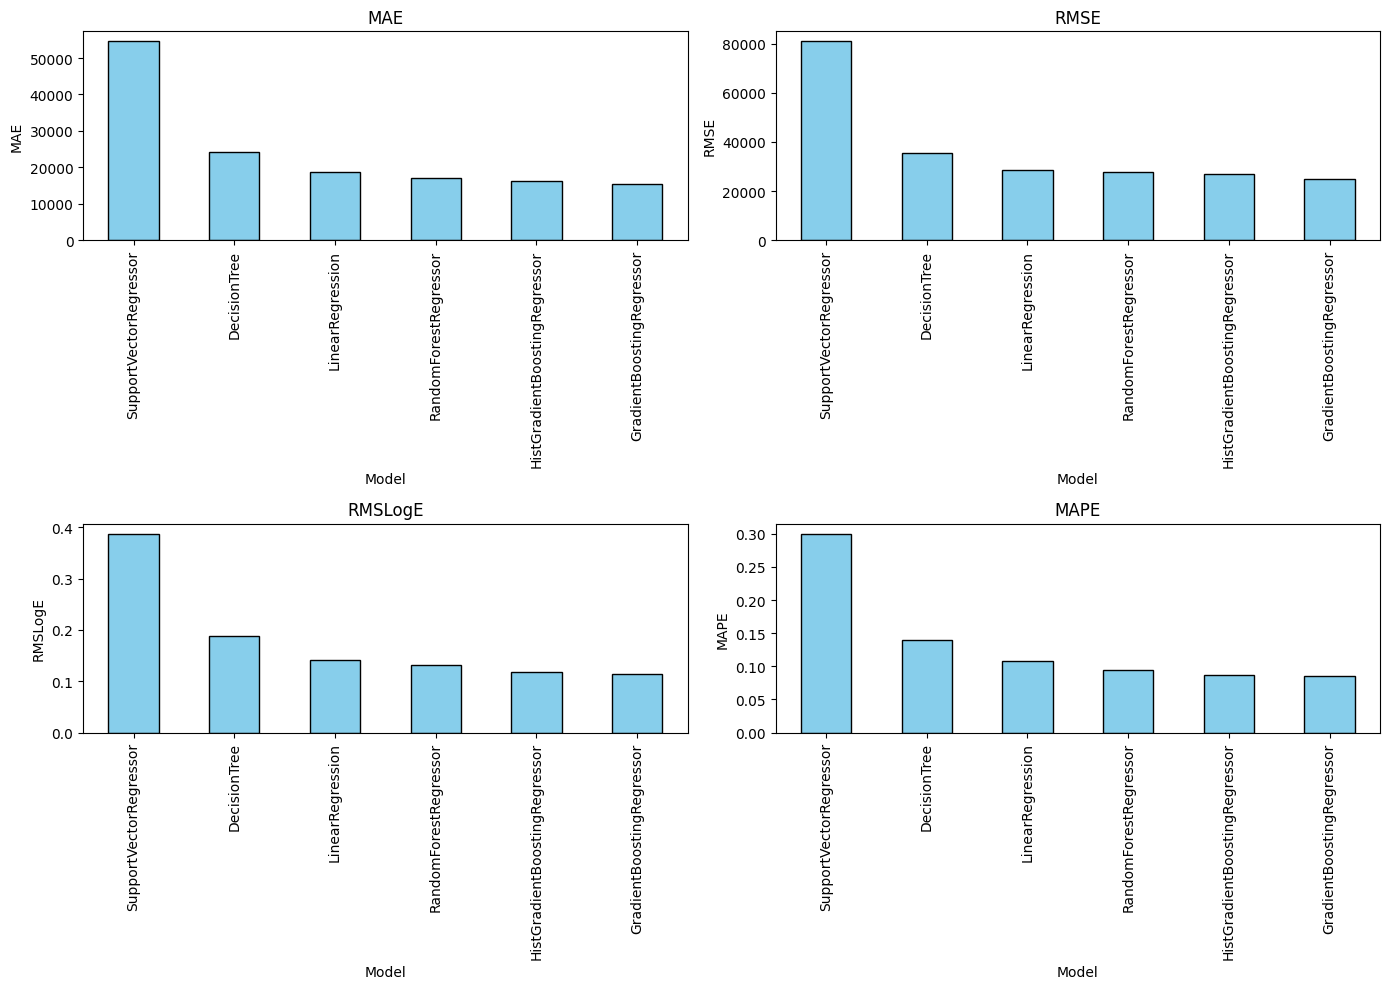

In [33]:
# Filter out Stochastic Gradient Descent
#filtered_df = comparison_df[comparison_df.index != 'StochasticGradientDecent']

# Sort the filtered DataFrame by R2_Score
sorted_df = comparison_df.sort_values(by='R2_Score')

# Plot each metric as a separate bar chart
metrics = ['MAE', 'RMSE', 'RMSLogE', 'MAPE', 'R2_Score']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for metric, ax in zip(metrics, axes.flatten()):
    sorted_df[metric].plot.bar(ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(metric)
    ax.set_xlabel('Model')
    ax.set_ylabel(metric)

plt.tight_layout()
plt.show()


---
### 4.3.Feature selection based on features and labels 🔧

#### 4.3.1 Function to compare short leasted Regressor models using default parameters + Feature Selection (KBest)

Based on the R-squared scores provided, the GradientBoostingRegressor model stands out as the best performer. A higher R-squared score indicates that the model can explain a larger proportion of the variance in the target labels (y) based on the features (X); meaning it can better capture the underlying relationships between the input features and the target labels, resulting in more accurate predictions.


For grid search I am going to use following three models
1. GradientBoostingRegressor
2. RandomForestRegressor
3. LinearRegression

pipeline = Preprocessor + feature_selection (KBest) + regressor_model

In [40]:
def evaluate_feature_regressors(x_train, y_train, x_test, y_test, preprocessor, feature_selection, regressors):
    """
    Trains and evaluates multiple regressors and returns a comparison DataFrame.

    Parameters:
        x_train (DataFrame): Training features.
        y_train (Series): Training target.
        x_test (DataFrame): Test features.
        y_test (Series): Test target.
        preprocessor: Preprocessing pipeline to apply to the data.
        feature_selection: Selecting features
        regressors (dict): Dictionary of regressors with names as keys and regressor objects as values.

    Returns:
        DataFrame: Comparison of R-squared and MAPE for each model.
    """
    results = {"MAE": [], "RMSE": [], "RMSLogE": [], "MAPE": [], "R2_Score": []}
    model_names = []

    for name, regressor in regressors.items():
        # Create and fit the pipeline
        pipeline = make_pipeline(preprocessor,          # Preprocessing step
                                 feature_selection,     # Feature selection step
                                 regressor              # Final regressor
                                 )
        pipeline.fit(x_train, y_train)

        # Predict and evaluate
        predictions = pipeline.predict(x_test)

        mae = mean_absolute_error(y_test, predictions)
        rmse = root_mean_squared_error(y_test, predictions)
        rmsloge = root_mean_squared_log_error(y_test, predictions)
        mape = mean_absolute_percentage_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        # Store results
        results["MAE"].append(mae)
        results["RMSE"].append(rmse)
        results["RMSLogE"].append(rmsloge)
        results["MAPE"].append(mape)
        results["R2_Score"].append(r2)
        model_names.append(name)

    # Return DataFrame
    return pd.DataFrame(results, index=model_names)


In [60]:
# Feature selection
# Initialise KBest, using the f-regression and setting k=10.
KBest = SelectKBest(score_func=f_regression, k=50)

# Regression models
regressors = {
    "LinearRegression": LinearRegression(),
    #"StochasticGradientDecent": SGDRegressor(), #(>10000 samples)
    #"SupportVectorRegressor": SVR(),
    "DecisionTree": DecisionTreeRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    #"HistGradientBoostingRegressor": HistGradientBoostingRegressor(),
    "RandomForestRegressor": RandomForestRegressor()
}

# Dataframe to save results
feature_models_df = evaluate_feature_regressors(x_train, y_train, x_test, y_test, preprocessor, KBest, regressors)
feature_models_df

,MAE,RMSE,RMSLogE,MAPE,R2_Score
LinearRegression,19688.564643,30903.811873,0.145859,0.111755,0.845452
DecisionTree,24907.465753,40780.702317,0.189497,0.136027,0.730879
GradientBoostingRegressor,15876.355992,24470.287075,0.117288,0.088322,0.903102
RandomForestRegressor,16410.729075,26209.554940,0.127067,0.092927,0.888838


#### 4.3.2 Recursive Feature Elimination
pipeline = Preprocessor + feature_selection (Recursive Feature Elimination) + regressor_model

In [70]:
def evaluate_rfe_regressors(x_train, y_train, x_test, y_test, preprocessor, regressors):
    """
    Trains and evaluates multiple regressors using RFE and returns a comparison DataFrame.

    Parameters:
        x_train (DataFrame): Training features.
        y_train (Series): Training target.
        x_test (DataFrame): Test features.
        y_test (Series): Test target.
        preprocessor: Preprocessing pipeline to apply to the data.
        regressors (dict): Dictionary of regressors with names as keys and regressor objects as values.

    Returns:
        DataFrame: Comparison of MAE, RMSE, MAPE, and R2 for each model.
        dict: Selected features for each model.
    """
    results = {"MAE": [], "RMSE": [], "RMSLogE":[], "MAPE": [], "R2_Score": []}
    model_names = []
    selected_features = {}

    for name, regressor in regressors.items():
        # Create RFE with cross-validation
        rfe = RFECV(estimator=regressor, cv=5, scoring="r2")

        # Create pipeline
        pipeline = make_pipeline(
            preprocessor,  # Preprocessing step
            rfe,           # Recursive feature elimination step
            regressor      # Final regressor
        )
        # Fit the pipeline
        pipeline.fit(x_train, y_train)

        # Get transformed feature names from the preprocessor
        if hasattr(preprocessor, "get_feature_names_out"):
            feature_names = preprocessor.get_feature_names_out(input_features=x_train.columns)
        else:
            feature_names = x_train.columns  # Fallback if preprocessor doesn't support `get_feature_names_out`

        # Get selected features from RFE
        rfe_step = pipeline.named_steps["rfecv"]
        support_mask = rfe_step.support_  # Boolean mask of selected features
        selected_features[name] = [feature for feature, selected in zip(feature_names, support_mask) if selected]

        # Predict and evaluate
        predictions = pipeline.predict(x_test)

        mae = mean_absolute_error(y_test, predictions)
        rmse = root_mean_squared_error(y_test, predictions)
        rmsloge = root_mean_squared_log_error(y_test, predictions)
        mape = mean_absolute_percentage_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        # Store results
        results["MAE"].append(mae)
        results["RMSE"].append(rmse)
        results["RMSLogE"].append(rmsloge)
        results["MAPE"].append(mape)
        results["R2_Score"].append(r2)
        model_names.append(name)

    # Return results DataFrame and selected features
    return pd.DataFrame(results, index=model_names), selected_features

In [71]:
# Regression models
regressors = {
    "LinearRegression": LinearRegression(),
    #"StochasticGradientDecent": SGDRegressor(), #(>10000 samples)
    #"SupportVectorRegressor": SVR(),
    #"DecisionTree": DecisionTreeRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state = 123),
    #"HistGradientBoostingRegressor": HistGradientBoostingRegressor(),
    "RandomForestRegressor": RandomForestRegressor(random_state = 123)
}

# Dataframe to save results
feature_rfe_models_df, selected_features = evaluate_rfe_regressors(x_train, y_train, x_test, y_test, preprocessor, regressors)
feature_rfe_models_df

,MAE,RMSE,RMSLogE,MAPE,R2_Score
LinearRegression,20294.826386,32482.217995,0.153025,0.113650,0.829262
GradientBoostingRegressor,15514.886152,24606.271929,0.114611,0.085616,0.902022
RandomForestRegressor,16494.874829,26231.721718,0.129000,0.093431,0.888649


In [72]:
# Convert to a DataFrame
df = pd.DataFrame.from_dict(selected_features, orient='index').transpose()

feature_rfe_models_df.to_csv("feature_rfe_models_regrssion.csv")
df.to_csv("selected_feature_rfe_regrssion.csv", index=False)
# Colab only
#from google.colab import files
#files.download('./feature_rfe_models_regrssion.csv')
#files.download('./selected_feature_rfe_regrssion.csv')

#### 4.3.3 Select From Model -Feature Selection
pipeline = Preprocessor + feature_selection (Select From Model) + regressor_model

In [80]:
def evaluate_sf_model_regressors(x_train, y_train, x_test, y_test, preprocessor, regressors):
    """
    Trains and evaluates multiple regressors using SelectFromModel and returns a comparison DataFrame.

    Parameters:
        x_train (DataFrame): Training features.
        y_train (Series): Training target.
        x_test (DataFrame): Test features.
        y_test (Series): Test target.
        preprocessor: Preprocessing pipeline to apply to the data.
        regressors (dict): Dictionary of regressors with names as keys and regressor objects as values.

    Returns:
        DataFrame: Comparison of MAE, RMSE, RMSLE, MAPE, and R2 for each model.
        dict: Selected features for each model.
    """
    results = {"MAE": [], "RMSE": [], "RMSLogE": [], "MAPE": [], "R2_Score": []}
    model_names = []
    selected_features = {}

    for name, regressor in regressors.items():
        # Create SelectFromModel
        select_model = SelectFromModel(estimator=regressor, threshold="mean")  # Use the mean feature importance threshold

        # Create pipeline
        pipeline = make_pipeline(
            preprocessor,  # Preprocessing step
            select_model,  # Feature selection step
            regressor      # Final regressor
        )

        # Fit the pipeline
        pipeline.fit(x_train, y_train)

        # Get transformed feature names from the preprocessor
        if hasattr(preprocessor, "get_feature_names_out"):
            feature_names = preprocessor.get_feature_names_out(input_features=x_train.columns)
        else:
            feature_names = x_train.columns  # Fallback if preprocessor doesn't support `get_feature_names_out`

        # Get selected features from SelectFromModel
        sfm_step = pipeline.named_steps["selectfrommodel"]
        support_mask = sfm_step.get_support()  # Boolean mask of selected features
        selected_features[name] = [feature for feature, selected in zip(feature_names, support_mask) if selected]

        # Predict and evaluate
        predictions = pipeline.predict(x_test)

        mae = mean_absolute_error(y_test, predictions)
        rmse = root_mean_squared_error(y_test, predictions, squared=False)

        # RMSLE computation with validation
        if (y_test > -1).all() and (predictions > -1).all():
            rmsle = root_mean_squared_log_error(y_test, predictions, squared=False)
        else:
            rmsle = None

        mape = mean_absolute_percentage_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        # Store results
        results["MAE"].append(mae)
        results["RMSE"].append(rmse)
        results["RMSLogE"].append(rmsle)
        results["MAPE"].append(mape)
        results["R2_Score"].append(r2)
        model_names.append(name)

    # Return results DataFrame and selected features
    return pd.DataFrame(results, index=model_names), selected_features

In [81]:
# Regression models
regressors = {
    #"LinearRegression": LinearRegression(),
    #"StochasticGradientDecent": SGDRegressor(), #(>10000 samples)
    #"SupportVectorRegressor": SVR(),
    #"DecisionTree": DecisionTreeRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state = 123),
    #"HistGradientBoostingRegressor": HistGradientBoostingRegressor(),
    "RandomForestRegressor": RandomForestRegressor(random_state = 123)
}

# Dataframe to save results
feature_select_models_df, selected_features = evaluate_rfe_regressors(x_train, y_train, x_test, y_test, preprocessor, regressors)
feature_select_models_df

,MAE,RMSE,RMSLogE,MAPE,R2_Score
GradientBoostingRegressor,15514.886152,24606.271929,0.114611,0.085616,0.902022
RandomForestRegressor,16494.874829,26231.721718,0.129000,0.093431,0.888649


In [83]:
# Convert to a DataFrame
df = pd.DataFrame.from_dict(selected_features, orient='index').transpose()

feature_select_models_df.to_csv("feature_select_models_regrssion.csv")
df.to_csv("selected_feature_select_regrssion.csv", index=False)
# Colab only
#from google.colab import files
#files.download('./feature_rfe_models_regrssion.csv')
#files.download('./selected_feature_rfe_regrssion.csv')

### 4.4 Function to save results of Grid Search

In [73]:
# Define multiple scoring metrics
scoring_metrics = {
    #"r2": make_scorer(r2_score),
    "neg_root_mean_squared_log_error": make_scorer(root_mean_squared_log_error),
}

# Initialize an empty list to store the results of each trial
Trial_results = []

# Function to run a trial with multiple scoring metrics
def RunTrial(trial_num, search, scoring_methods):
    # Fit the GridSearchCV object
    search.fit(x_train, y_train)

    # Extract best scores for each metric
    best_scores = {f"best_{metric}_score": search.cv_results_[f"mean_test_{metric}"][search.best_index_] for metric in scoring_methods}

    # Collect results
    results = {
        "trial_id": trial_num,
        "best_params": search.best_params_,
        "best_estimator": search.best_estimator_,
    }
    # Add best scores to the results
    results.update(best_scores)

    # Append to trial results list
    Trial_results.append(results)

#### GradientBoostingRegressor Grid Search

In [ ]:
#GradientBoostingRegressor 
full_pipeline_GBR = make_pipeline(preprocessor,
                                  GradientBoostingRegressor(random_state=123))
full_pipeline_GBR

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'TotalBsmtSF', 'PoolArea',
                                                   'WoodDeckSF', 'ScreenPorch',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnf...
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['MSZoning', 'Condition1',
                                                   'Heating', 'Foundation',
                                                   'Neighborhood', 'Condition2',
                                                   'BldgType'])])),
                ('selectkbest',
                 SelectKBest(k=50,
                             score_func=<function f_regression at 0x00000290D5806840>)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=123))])

In [ ]:
param_grid_GBR = {
    #"columntransformer__pipeline-1__simpleimputer__strategy": ["mean", "median"],
    #"columntransformer__pipeline-1__standardscaler__with_mean": [True, False],
    #"columntransformer__pipeline-1__standardscaler__with_std": [True, False],
    "gradientboostingregressor__n_estimators": range(200, 500, 100),
    "gradientboostingregressor__learning_rate": [0.01, 0.05, 0.1],
    "gradientboostingregressor__max_depth": range(3, 10, 2),
    #"gradientboostingregressor__min_samples_split": [2, 5, 10],
    #"gradientboostingregressor__min_samples_leaf": [1, 5, 10],
    #"gradientboostingregressor__subsample": [0.6, 0.8, 1.0],
    #"gradientboostingregressor__max_features": ["sqrt", "log2", None]
}

GBR_grid_search = GridSearchCV(
    full_pipeline_GBR,
    param_grid_GBR,
    scoring=scoring_metrics,  # Or other metrics like R² or MAE
    cv=5,  # 5-fold cross-validation  # StratifiedKFold(n_splits=5, shuffle=False)
    refit="neg_root_mean_squared_log_error",
    n_jobs=-1,  # Use all available cores
    verbose=1
)

RunTrial(trial_num="trialGBR", search= GBR_grid_search, scoring_methods=scoring_metrics.keys())

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


#### GradientBoostingRegressor Grid Search with KBest

In [ ]:
#GradientBoostingRegressor 
full_pipeline_GBR_kbest = make_pipeline(preprocessor,
                                  KBest,
                                  GradientBoostingRegressor(random_state=123))
full_pipeline_GBR_kbest

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'TotalBsmtSF', 'PoolArea',
                                                   'WoodDeckSF', 'ScreenPorch',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnf...
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['MSZoning', 'Condition1',
                                                   'Heating', 'Foundation',
                                                   'Neighborhood', 'Condition2',
                                                   'BldgType'])])),
                ('selectkbest',
                 SelectKBest(k=50,
                             score_func=<function f_regression at 0x00000290D5806840>)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=123))])

In [77]:
param_grid_GBR_kbest = {
    #"columntransformer__pipeline-1__simpleimputer__strategy": ["mean", "median"],
    #"columntransformer__pipeline-1__standardscaler__with_mean": [True, False],
    #"columntransformer__pipeline-1__standardscaler__with_std": [True, False],
    "selectkbest__k": range(10, 100, 10),
    "gradientboostingregressor__n_estimators": range(200, 500, 100),
    "gradientboostingregressor__learning_rate": [0.01, 0.05],
    "gradientboostingregressor__max_depth": range(3, 10, 2),
    #"gradientboostingregressor__min_samples_split": [2, 5, 10],
    #"gradientboostingregressor__min_samples_leaf": [1, 5, 10],
    #"gradientboostingregressor__subsample": [0.6, 0.8, 1.0],
    #"gradientboostingregressor__max_features": ["sqrt", "log2", None]
}

GBR_grid_search_kbest = GridSearchCV(
    full_pipeline_GBR_kbest,
    param_grid_GBR_kbest,
    scoring=scoring_metrics,  # Or other metrics like R² or MAE
    cv=5,  # 5-fold cross-validation  # StratifiedKFold(n_splits=5, shuffle=False)
    refit="neg_root_mean_squared_log_error",
    n_jobs=-1,  # Use all available cores
    verbose=1
)

RunTrial(trial_num="trialGBR_kbest", search= GBR_grid_search_kbest, scoring_methods=scoring_metrics.keys())

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


#### GradientBoostingRegressor Grid Search with RFECV

In [36]:
# Define RFECV with an initialized estimator
rfe = RFECV(estimator=GradientBoostingRegressor(random_state=123), scoring="r2")


#GradientBoostingRegressor
full_pipeline_GBR_rfe = make_pipeline(preprocessor,
                                  rfe)
                                  #GradientBoostingRegressor(random_state=123))
full_pipeline_GBR_rfe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'TotalBsmtSF', 'PoolArea',
                                                   'WoodDeckSF', 'ScreenPorch',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnf...
                                                 ('pipeline-4',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['MSZoning', 'Condition1',
                                                   'Heating', 'Foundation',
                                                   'Neighborhood', 'Condition2',
                                                   'BldgType'])])),
                ('rfecv',
                 RFECV(estimator=GradientBoostingRegressor(random_state=123),
                       scoring='r2'))])

In [ ]:
param_grid_GBR_rfe = {
    # Uncomment and modify the following if you need to tune preprocessor steps as well:
    #"columntransformer__pipeline-1__simpleimputer__strategy": ["mean", "median"],
    #"columntransformer__pipeline-1__standardscaler__with_mean": [True, False],
    #"columntransformer__pipeline-1__standardscaler__with_std": [True, False],

    # GradientBoostingRegressor inside RFECV
    "rfecv__estimator__learning_rate":  [0.05],
    "rfecv__estimator__max_depth": range(4, 8, 2)
    #"rfecv__estimator__min_samples_split": [3, 5, 10],
    #"rfecv__estimator__min_samples_leaf": [2, 5, 10],
    #"rfecv__estimator__subsample": [0.6, 0.8, 1.0],
    #"rfecv__estimator__max_features": ["sqrt", "log2", None]
}


GBR_grid_search_rfe = GridSearchCV(
    full_pipeline_GBR_rfe,
    param_grid_GBR_rfe,
    scoring=scoring_metrics,  # Or other metrics like R² or MAE
    cv=5,  # 5-fold cross-validation  # StratifiedKFold(n_splits=5, shuffle=False)
    #refit="r2",
    n_jobs=-1,  # Use all available cores
    verbose=3
)

RunTrial(trial_num="trialGBR_rfe", search= GBR_grid_search_rfe, scoring_methods=scoring_metrics.keys())

Fitting 5 folds for each of 2 candidates, totalling 10 fits


#### RandomForestRegressor Grid Search

In [ ]:
#RandomForestRegressor
full_pipeline_RFR = make_pipeline(preprocessor,
                                  KBest,
                                  RandomForestRegressor(random_state = 123))
full_pipeline_RFR

In [ ]:
param_grid_RFR = {
    #"columntransformer__pipeline-1__simpleimputer__strategy": ["mean", "median"],
    #"columntransformer__pipeline-1__standardscaler__with_mean": [True, False],
    #"columntransformer__pipeline-1__standardscaler__with_std": [True, False],
    "selectkbest__k": range(20, 60, 20),
    "randomforestregressor__n_estimators": [100, 150, 200],
    "randomforestregressor__max_depth": range(3, 10, 2),
    "randomforestregressor__min_samples_split": [2, 5, 10],
    "randomforestregressor__min_samples_leaf": [1, 5, 10],
    "randomforestregressor__max_features": ["sqrt", "log2", None],
    "randomforestregressor__criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"]
}

RFR_grid_search = GridSearchCV(
    full_pipeline_RFR,
    param_grid_RFR,
    scoring=scoring_metrics,  # Or other metrics like R² or MAE
    cv=5,  # 5-fold cross-validation  # StratifiedKFold(n_splits=5, shuffle=False)
    refit="r2",
    n_jobs=-1,  # Use all available cores
    verbose=1
)

RunTrial(trial_num="trialRFR", search= RFR_grid_search, scoring_methods=scoring_metrics.keys())

#### Linear Regrssion Grid Search

In [ ]:
# Define RFECV with an initialized estimator
rfe = RFECV(estimator=GradientBoostingRegressor(random_state=123), cv=3, scoring="r2")

#RandomForestRegressor
full_pipeline_LR_rfe = make_pipeline(preprocessor,
                                 rfe,
                                 LinearRegression())
full_pipeline_LR_rfe

In [ ]:
param_grid_LR = {
    #"columntransformer__pipeline-1__simpleimputer__strategy": ["mean", "median"],
    #"columntransformer__pipeline-1__standardscaler__with_mean": [True, False],
    #"columntransformer__pipeline-1__standardscaler__with_std": [True, False],
    "linearregression__fit_intercept": [True, False]
    #"selectkbest__k": range(20, 60, 20)
}

LR_grid_search = GridSearchCV(
    full_pipeline_LR_rfe,
    param_grid_LR,
    scoring=scoring_metrics,  # Or other metrics like R² or MAE
    cv=5,  # 5-fold cross-validation  # StratifiedKFold(n_splits=5, shuffle=False)
    refit="r2",
    n_jobs=-1,  # Use all available cores
    verbose=1
)

RunTrial(trial_num="trialLR_rfe", search= LR_grid_search, scoring_methods=scoring_metrics.keys())

In [ ]:
# Ridge Regression with GridSearchCV
ridge_pipeline = make_pipeline(StandardScaler(), Ridge())
ridge_param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0],
    'ridge__fit_intercept': [True, False],
}

ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_param_grid, cv=5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)

RunTrial(trial_num="trialridge", search= ridge_grid_search, scoring_methods=scoring_metrics.keys())

In [ ]:
# Lasso Regression with GridSearchCV
lasso_pipeline = make_pipeline(StandardScaler(), Lasso())
lasso_param_grid = {
    'lasso__alpha': [0.1, 1.0, 10.0],
    'lasso__fit_intercept': [True, False],
}

lasso_grid_search = GridSearchCV(lasso_pipeline, lasso_param_grid, cv=5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)

RunTrial(trial_num="triallasso", search= lasso_grid_search, scoring_methods=scoring_metrics.keys())

#### Saving results of trial

In [79]:
# Convert results to a DataFrame
Trials_result_df = pd.DataFrame(Trial_results)

# Save the DataFrame to a CSV file
Trials_result_df.to_csv("grid_search_trials_results_regrssion.csv")

# Display the results
Trials_result_df

# Colab only
#from google.colab import files
#files.download('./grid_search_trials_results_regrssion.csv')

,trial_id,best_params,best_estimator,best_neg_root_mean_squared_log_error_score
0,trialGBR_kbest,{'gradientboostingregressor__learning_rate': 0...,(ColumnTransformer(force_int_remainder_cols=Fa...,0.198298


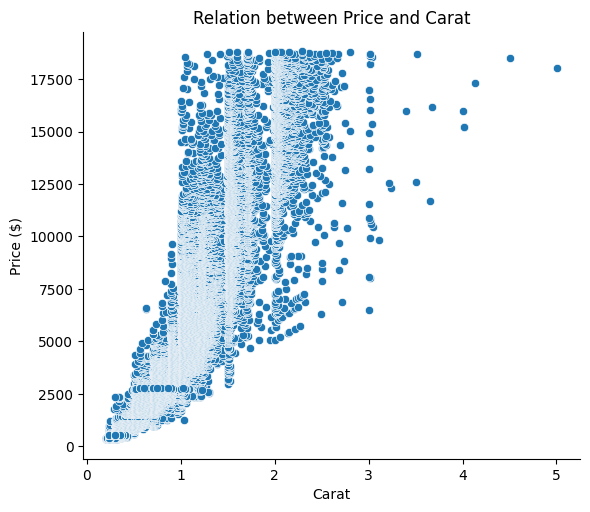

In [ ]:
(
  sns.relplot(data=diamonds,
              x='carat',
              y='price',
              height=5,
              aspect=1.2)
  .set(title='Relation between Price and Carat')
  .set_axis_labels('Carat', 'Price ($)')
);

Looking at our plot of the relationship between carat and price, we can come up with a simple dummy model based on a linear relationship between the two variables. For example, we can assume that the price of a diamond is roughly 6,000 times its carat weight. This would give us a simple model like:

`price = carat * 6000`

Let's plot a line on the chart to see how carat * 6000 would look

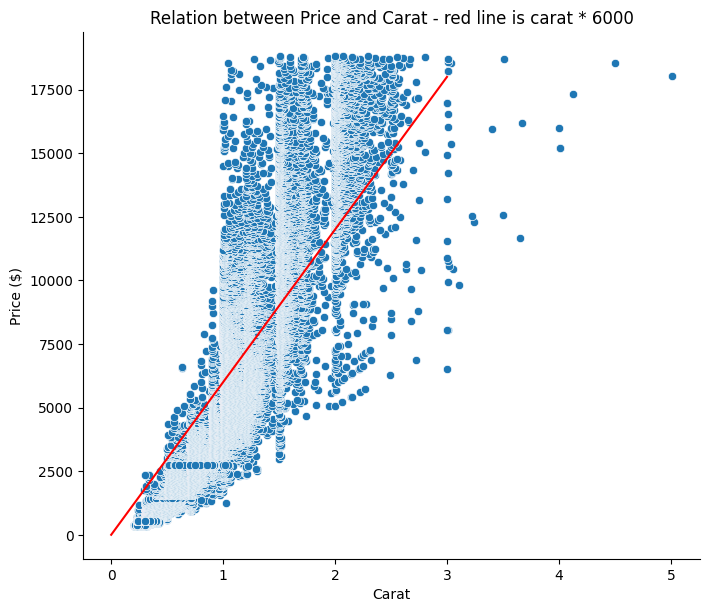

In [ ]:
(
  sns.relplot(data=diamonds,
              x='carat',
              y='price',
              height=6,
              aspect=1.2)
  .set(title='Relation between Price and Carat - red line is carat * 6000')
  .set_axis_labels('Carat', 'Price ($)')
)
plt.plot([0, 3], [0, 18000], 'r-')
plt.show();

In [ ]:
def dummy_model(carat):
    return carat * 6000

Now let's make predictions for the test set using our dummy model.

In [ ]:
dummy_y_test_pred = dummy_model(X_test['carat'])

Now that we have our predictions for the test set, we can evaluate how good (or bad) these predictions are.

## 5. Final fitting of GBR model with best parameters

In [230]:
select_model = SelectFromModel(estimator=GradientBoostingRegressor(n_estimators=500, random_state=123), threshold="median")

GradientBoosting_pipe = make_pipeline(preprocessor,
                                    select_model,
                                    GradientBoostingRegressor( loss='huber', learning_rate=0.1, n_estimators=400, subsample=1.0, criterion='friedman_mse', min_samples_split=7, min_samples_leaf=2, max_depth=3, random_state=123
                                )
                                 )
GradientBoosting_pipe.fit(x_train, y_train)

# Predict and evaluate
predictions = GradientBoosting_pipe.predict(x_test)

rmsloge = root_mean_squared_log_error(y_test, predictions)
print(f"RMSLogE: {rmsloge}")

RMSLogE: 0.0988796600737568


In [222]:
#select_model.feature_names_in_
select_model.n_features_in_

136

In [223]:
GradientBoosting_pipe.fit(X, Y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'TotalBsmtSF', 'PoolArea',
                                                   'WoodDeckSF', 'ScreenPorch',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',...
                                                  ['MSZoning', 'Condition1',
                                                   'Heating', 'Foundation',
                                                   'Neighborhood', 'Condition2',
                                                   'BldgType'])])),
                ('selectfrommodel',
                 SelectFromModel(estimator=GradientBoostingRegressor(n_estimators=500,
                                                                     random_state=123),
                                 threshold='median')),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(loss='huber', min_samples_leaf=2,
                                           min_samples_split=7,
                                           n_estimators=400,
                                           random_state=123))])

In [224]:
url = "https://drive.google.com/file/d/1Wh-b0t5PctHWO-Mgg32egebH0l_1IzjQ/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
testing_data_HP = pd.read_csv(path)
testing_data_HP = testing_data_HP.set_index('Id')

testing_data_HP['SalePrice'] = GradientBoosting_pipe.predict(testing_data_HP)

testing_data_HP['SalePrice'].to_csv('submission_GB1_Regression.csv')

# Colab only
#from google.colab import files
#files.download('./submission_GB_Regression.csv')

## Theory related to Regressor models

### 1. Decision Tree Regrssor
Step-by-Step Process:

1. **Start with All Data:** Begin with the entire dataset.
2. **Find the Best Split:** Look for the feature and value that best splits the data into two groups to minimize prediction errors.
3. **Create Branches:** Split the data based on the best feature and value.
4. **Repeat:** Apply the same process recursively on each branch to create further splits until a stopping condition is met (like a maximum tree depth or minimum data points in a leaf).
5. **Make Predictions:** For a new data point, follow the decision rules down the branches of the tree to reach a leaf node, which provides the predicted value.

### 2. SGDRegressor

Step-by-Step Process:

1. **Initialize Weights:** Start with random values for the model’s parameters (weights).
2. **Choose a Data Batch:** Pick a small, random subset of the training data.
3. **Calculate Error:** Use the current weights to make predictions and calculate the difference between predicted and actual values (error).
4. **Update Weights:** Adjust the weights slightly in the direction that reduces the error based on the gradient of the error with respect to the weights.
5. **Repeat:** Continue selecting new batches and updating weights until the model’s performance stabilizes or a set number of iterations is reached.
6. **Make Predictions:** Use the final weights to predict values for new data.

### 3. LinearRegrssion
1. **Assume a Model:** Start with a linear equation of the form: 𝑦 = weights × features + bias
2. **Fit the Line:** Adjust the weights and bias to find the line that best fits the data points.
3. **Calculate Predictions:** Use the current weights and bias to predict values for the training data.
4. **Measure Error:** Find the difference between predicted values and actual values.
5. **Adjust Parameters:** Update weights and bias to minimize the error.
6. **Optimize Line:** Repeat adjusting weights and bias until the line best fits the data points.
7. **Make Predictions:** Use the final line equation to predict values for new data.

---
### 4.2.Feature selection based on features and labels 🔧

#### 4.2.1 K Best

Scikit-Learn computes the f-statistic for each univariate linear model (one for each feature). The f-statistic measures how much better the linear model with a single feature predicts compared to using only a constant value. This "score" allows us to rank the features.


The SelectKBest transformer performs this test and allows you to control the number of "top" features to retain using the K parameter. For our initial selection, we will set K=10, but feel free to adjust this value as needed.

> **Note:** In a pipeline with `GridSearchCV`, you can fine-tune the `K` parameter by trying out various possible values, along with other preprocessing and modeling parameters. Machine Learning often involves automated search or optimisation techniques to find the best parameter values, and it is normal not to have to intuitively know the ideal parameter values from the outset.

#### 4.2.2 Recursive Feature Elimination

Recursive Feature Elimination (RFE) is an automatic feature selection technique that efficiently identifies the most relevant features from a dataset. It begins by training a chosen model on all features and recording its performance. Then, it iteratively removes the least important features based on their importance rankings, continuously evaluating model performance. As long as the performance remains steady or improves, RFE keeps dropping features one by one. Once the performance starts to decline, it stops and saves the model, eliminating the need for manual or fine-tuning decisions on the number of features to keep.

However, it's essential to use a model capable of computing "feature importances" for RFE to be effective, and tree-based models are generally suitable for this purpose, unlike models like KNN. In scikit-learn, you can check if the model has an attribute called `feature_importances_`.

#### 4.2.3 Select from model

[SelectFromModel](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html?highlight=selectfrommodel#sklearn.feature_selection.SelectFromModel) leverages the importance scores provided by a model to select the most relevant features from a given dataset. The process involves training a model on the entire feature set, obtaining the feature importances or coefficients from the model, and then selecting the features based on a specified threshold. If you don't include a threshold, SelectFromModel will automatically select the best features for you, using the model's inherent feature importance ranking. This approach is particularly useful for models that inherently provide feature importances, such as tree-based models or linear models, allowing us to focus on the most influential features and improve model performance while reducing complexity.
> **Note:** SelectFromModel may seem similar to RFE since both methods use inherent feature importance scores, but they operate differently. Unlike RFE, SelectFromModel solely concentrates on the top features based on their individual predictive power, without considering interactions between features.

---
## 7.&nbsp;Assessing a regression model manually 👀
Beyond examining the individual output metrics from SKLearn, we can gain deeper insights by visualising the calculated differences and plotting them. This approach allows us to evaluate the performance of our regression model more comprehensively.

### 7.1.&nbsp;Histogram of errors
By examining the histogram, we can assess if the errors follow a normal distribution, detect outliers, and identify any skewed data, ultimately aiding us in refining our model and addressing potential issues.

#### 7.1.1.&nbsp; Histogram of errors - dummy model
To construct the histogram, we begin by computing the errors. We expand our test set with two columns: the actual price and the predicted price. By examining the difference between these columns, we can evaluate the errors made by our model.

In [ ]:
dummy_errors_df = X_test.copy()
dummy_errors_df["price"] = y_test
dummy_errors_df["prediction"] = dummy_y_test_pred
dummy_errors_df["error"] = dummy_errors_df["prediction"] - dummy_errors_df["price"]

In [ ]:
dummy_errors_df

,carat,cut,color,clarity,depth,table,x,y,z,price,prediction,error
1388,0.24,Ideal,G,VVS1,62.1,56.0,3.97,4.00,2.47,559,1440.0,881.0
50052,0.58,Very Good,F,VVS2,60.0,57.0,5.44,5.42,3.26,2201,3480.0,1279.0
41645,0.40,Ideal,E,VVS2,62.1,55.0,4.76,4.74,2.95,1238,2400.0,1162.0
42377,0.43,Premium,E,VVS2,60.8,57.0,4.92,4.89,2.98,1304,2580.0,1276.0
17244,1.55,Ideal,E,SI2,62.3,55.0,7.44,7.37,4.61,6901,9300.0,2399.0
...,...,...,...,...,...,...,...,...,...,...,...,...
44081,0.50,Very Good,E,VS1,61.6,59.0,5.06,5.14,3.14,1554,3000.0,1446.0
23713,0.25,Very Good,F,VVS2,61.6,57.0,4.05,4.07,2.50,633,1500.0,867.0
31375,0.31,Good,G,VVS1,58.0,62.0,4.42,4.47,2.58,761,1860.0,1099.0
21772,1.23,Ideal,F,VS1,62.5,54.0,6.85,6.82,4.27,9836,7380.0,-2456.0


Now that we have the error calculated for each row we can plot it.

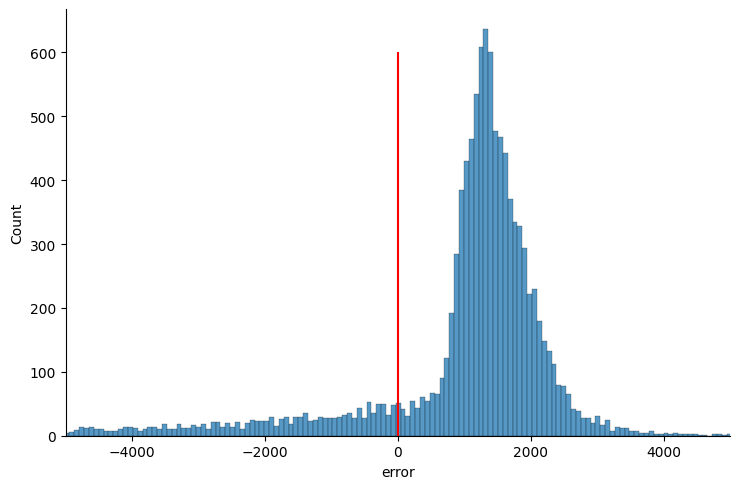

In [ ]:
sns.displot(dummy_errors_df['error'],
            aspect=1.5)
plt.vlines(x=0,
           ymin=0,
           ymax=600,
           color='red')
plt.xlim(-5000,
         5000)
plt.show()

Our dumb model's predictions exhibit a left-skewed distribution, indicating a consistent tendency to overpredict the diamond prices. Specifically, there is a prominent peak on the right-hand side, where the model frequently overestimates the price by approximately $1700.

#### 7.1.2.&nbsp;Histogram of errors - decision tree model

In [ ]:
dt_errors_df = X_test.copy()
dt_errors_df["price"] = y_test
dt_errors_df["prediction"] = dt_predictions
dt_errors_df["error"] = dt_errors_df["prediction"] - dt_errors_df["price"]

In [ ]:
dt_errors_df

,carat,cut,color,clarity,depth,table,x,y,z,price,prediction,error
1388,0.24,Ideal,G,VVS1,62.1,56.0,3.97,4.00,2.47,559,559.0,0.0
50052,0.58,Very Good,F,VVS2,60.0,57.0,5.44,5.42,3.26,2201,2321.0,120.0
41645,0.40,Ideal,E,VVS2,62.1,55.0,4.76,4.74,2.95,1238,1238.0,0.0
42377,0.43,Premium,E,VVS2,60.8,57.0,4.92,4.89,2.98,1304,1135.0,-169.0
17244,1.55,Ideal,E,SI2,62.3,55.0,7.44,7.37,4.61,6901,9471.0,2570.0
...,...,...,...,...,...,...,...,...,...,...,...,...
44081,0.50,Very Good,E,VS1,61.6,59.0,5.06,5.14,3.14,1554,1849.0,295.0
23713,0.25,Very Good,F,VVS2,61.6,57.0,4.05,4.07,2.50,633,575.0,-58.0
31375,0.31,Good,G,VVS1,58.0,62.0,4.42,4.47,2.58,761,642.0,-119.0
21772,1.23,Ideal,F,VS1,62.5,54.0,6.85,6.82,4.27,9836,9660.0,-176.0


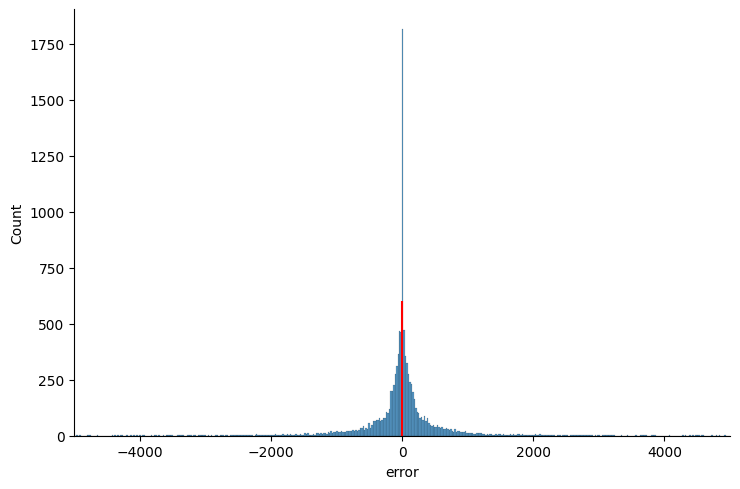

In [ ]:
sns.displot(dt_errors_df['error'],
            aspect=1.5)
plt.vlines(x=0,
           ymin=0,
           ymax=600,
           color='red')
plt.xlim(-5000,
         5000)
plt.show()

We can see from our decision tree model that it is much more even handed in its over- and underestimation of the price. Also, there are significantly less large errors here compared to the dummy model.

### 7.2.&nbsp;Scatterplot of errors
A scatterplot can help guide us in a similar manner to a histogram

#### 7.2.1.&nbsp; Scatterplot of errors - dummy model

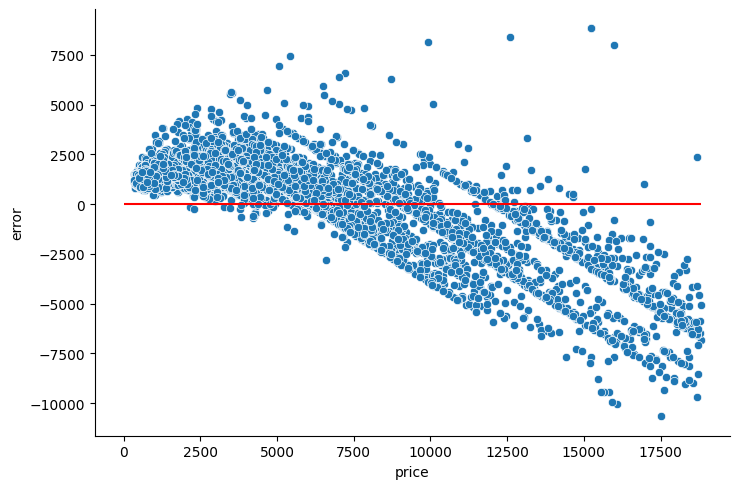

In [ ]:
sns.relplot(data=dummy_errors_df,
            x='price',
            y='error',
            aspect=1.5)
plt.hlines(y=0,
           xmin=0,
           xmax=max(dummy_errors_df['price']),
           color='red')
plt.show()

We can see that the more expensive the diamonds become, the worse our model is at predicting the price.

#### 7.2.2.&nbsp;Scatterplot of errors - decision tree model

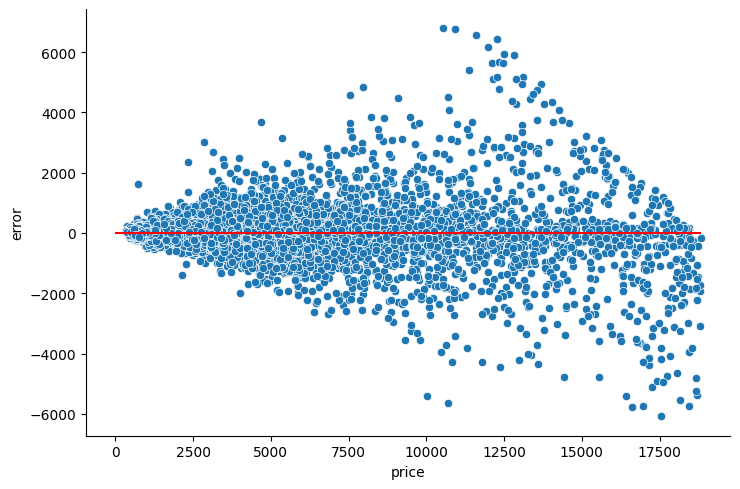

In [ ]:
sns.relplot(data=dt_errors_df,
            x='price',
            y='error',
            aspect=1.5)
plt.hlines(y=0,
           xmin=0,
           xmax=max(dt_errors_df['price']),
           color='red')
plt.show()

From the y-axis range, it is evident that the decision tree performs better in predicting the price overall. The increased symmetry in the plot indicates that the model is not solely overpredicting or underpredicting, showing a balanced performance. However, the model still struggles with predicting prices for expensive diamonds. Remember, all models are wrong, but some are useful. Is our decision tree model useful? If yes, where would it be useful?